In [1]:
import numpy as np
import pandas as pd

file_path = r"C:\Users\paulb\Downloads\processed-global\global\global.tsv"

chunks = []
df= pd.read_csv(file_path, sep='\t', nrows=10000)
    
    
df.head()

,pdb_fn,mutations,job_uuid,start_time,run_time,mutate_run_time,relax_run_time,filter_run_time,centroid_run_time,total_score,...,env,hs_pair,linear_chainbreak,overlap_chainbreak,pair,rg,rsigma,sheet,ss_pair,vdw
0,1h2e_A_p.pdb,"I147H,E184Y,D197M",H3nR4rJYwcWg,2022-01-14 11:19:23,161,61,67,31,0,-661.562,...,-40.180,3.108,0.0,0.0,-42.563,50.223,-44.047,11.670,-50.127,0.269
1,1a6m_A_p.pdb,"S35T,I99R",H3nR4rJYwcWg,2022-01-14 12:33:34,107,40,38,27,0,-460.501,...,-65.782,0.000,0.0,0.0,-26.542,45.738,0.000,0.000,0.000,0.000
2,1gbs_A_p.pdb,"G88A,A175Y",H3nR4rJYwcWg,2022-01-14 11:49:24,134,57,48,28,0,-558.100,...,-39.409,1.372,0.0,0.0,-40.491,45.760,0.000,7.551,0.000,0.435
3,1jo0_remod_p.pdb,"L11Q,I62E,Q94G",JQKTZiHTm96c,2022-02-12 11:19:22,90,31,32,25,0,-296.940,...,-33.369,0.835,0.0,0.0,-17.832,40.262,-20.618,11.670,-23.427,0.000
4,1cjw_A_p.pdb,"L11A,E14V,L110E,Q140M",H3nR4rJYwcWg,2022-01-14 12:21:15,126,46,50,28,0,-471.901,...,-35.795,4.552,0.0,0.0,6.061,45.763,-42.011,7.894,-51.185,0.758


In [2]:
print(df.columns.tolist())
print(len(df))

['pdb_fn', 'mutations', 'job_uuid', 'start_time', 'run_time', 'mutate_run_time', 'relax_run_time', 'filter_run_time', 'centroid_run_time', 'total_score', 'dslf_fa13', 'fa_atr', 'fa_dun', 'fa_elec', 'fa_intra_rep', 'fa_intra_sol_xover4', 'fa_rep', 'fa_sol', 'hbond_bb_sc', 'hbond_lr_bb', 'hbond_sc', 'hbond_sr_bb', 'lk_ball_wtd', 'omega', 'p_aa_pp', 'pro_close', 'rama_prepro', 'ref', 'yhh_planarity', 'filter_total_score', 'buried_all', 'buried_np', 'contact_all', 'contact_buried_core', 'contact_buried_core_boundary', 'degree', 'degree_core', 'degree_core_boundary', 'exposed_hydrophobics', 'exposed_np_AFIMLWVY', 'exposed_polars', 'exposed_total', 'one_core_each', 'pack', 'res_count_all', 'res_count_buried_core', 'res_count_buried_core_boundary', 'res_count_buried_np_core', 'res_count_buried_np_core_boundary', 'ss_contributes_core', 'ss_mis', 'total_hydrophobic', 'total_hydrophobic_AFILMVWY', 'total_sasa', 'two_core_each', 'unsat_hbond', 'centroid_total_score', 'cbeta', 'cenpack', 'env', 'h

In [ ]:
keep = ['pdb_fn', 'mutations', 'total_score', 'dslf_fa13', 'fa_atr', 'fa_dun', 'fa_elec', 'fa_intra_rep', 'fa_intra_sol_xover4', 'fa_rep', 'fa_sol', 'hbond_bb_sc', 'hbond_lr_bb', 'hbond_sc', 'hbond_sr_bb', 'lk_ball_wtd', 'omega', 'p_aa_pp', 'pro_close', 'rama_prepro', 'ref', 'yhh_planarity', 'filter_total_score', 'buried_all', 'buried_np', 'contact_all', 'contact_buried_core', 'contact_buried_core_boundary', 'degree', 'degree_core', 'degree_core_boundary', 'exposed_hydrophobics', 'exposed_np_AFIMLWVY', 'exposed_polars', 'exposed_total', 'one_core_each', 'pack', 'res_count_all', 'res_count_buried_core', 'res_count_buried_core_boundary', 'res_count_buried_np_core', 'res_count_buried_np_core_boundary', 'ss_contributes_core', 'ss_mis', 'total_hydrophobic', 'total_hydrophobic_AFILMVWY', 'total_sasa', 'two_core_each', 'unsat_hbond', 'centroid_total_score', 'cbeta', 'cenpack', 'env', 'hs_pair', 'linear_chainbreak', 'overlap_chainbreak', 'pair', 'rg', 'rsigma', 'sheet', 'ss_pair', 'vdw']

rosetta = ['pdb_fn', 'dslf_fa13', 'fa_atr', 'fa_dun', 'fa_elec', 'fa_intra_rep', 'fa_intra_sol_xover4', 'fa_rep', 'fa_sol', 'hbond_bb_sc', 'hbond_lr_bb', 'hbond_sc', 'hbond_sr_bb', 'lk_ball_wtd', 'omega', 'p_aa_pp', 'pro_close', 'rama_prepro', 'ref', 'yhh_planarity']

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

rosetta_numeric = [c for c in rosetta if c != 'pdb_fn']
df_rosetta = df[rosetta_numeric]

correlation = df_rosetta.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='bwr', center=0)
plt.title("Correlation of rosetta components")
plt.show()

NameError: name 'rosetta' is not defined

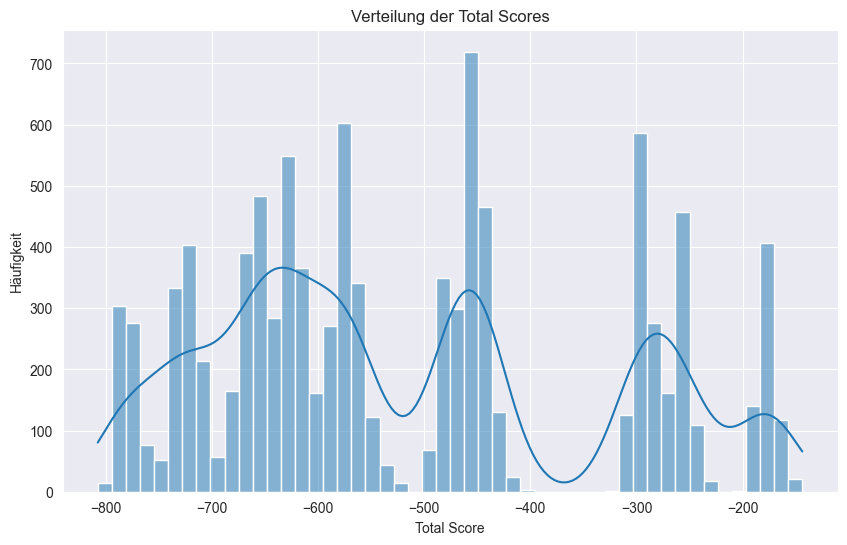

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df['total_score'], bins=50, kde=True)
plt.xlabel("Total Score")
plt.ylabel("Häufigkeit")
plt.title("Verteilung der Total Scores")
plt.show()